In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (15,7)
plt.rcParams["figure.dpi"] = 200

# Problem 1

In [69]:
def convolve(arr1, arr2):
    """Convolve two arrays using the convolution theorem."""
    dtype = (arr1 + arr2).dtype
    return np.fft.ifft(np.fft.fft(arr1) * np.fft.fft(arr2)).astype(dtype)

In [70]:
def shift(arr, amount):
    """Shift an array by some number of indices using a convolution."""
    translator = np.zeros_like(arr)
    translator[amount] = 1
    return convolve(arr, translator)

In [71]:
xvals = np.linspace(-5, 5, 1000)
# Gaussian with unit variance
gaussian = np.exp(-0.5 * xvals ** 2) / np.sqrt(2 * np.pi)
shifted_gaussian = shift(gaussian, xvals.size // 2)

/home/bobby/anaconda3/envs/hera/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


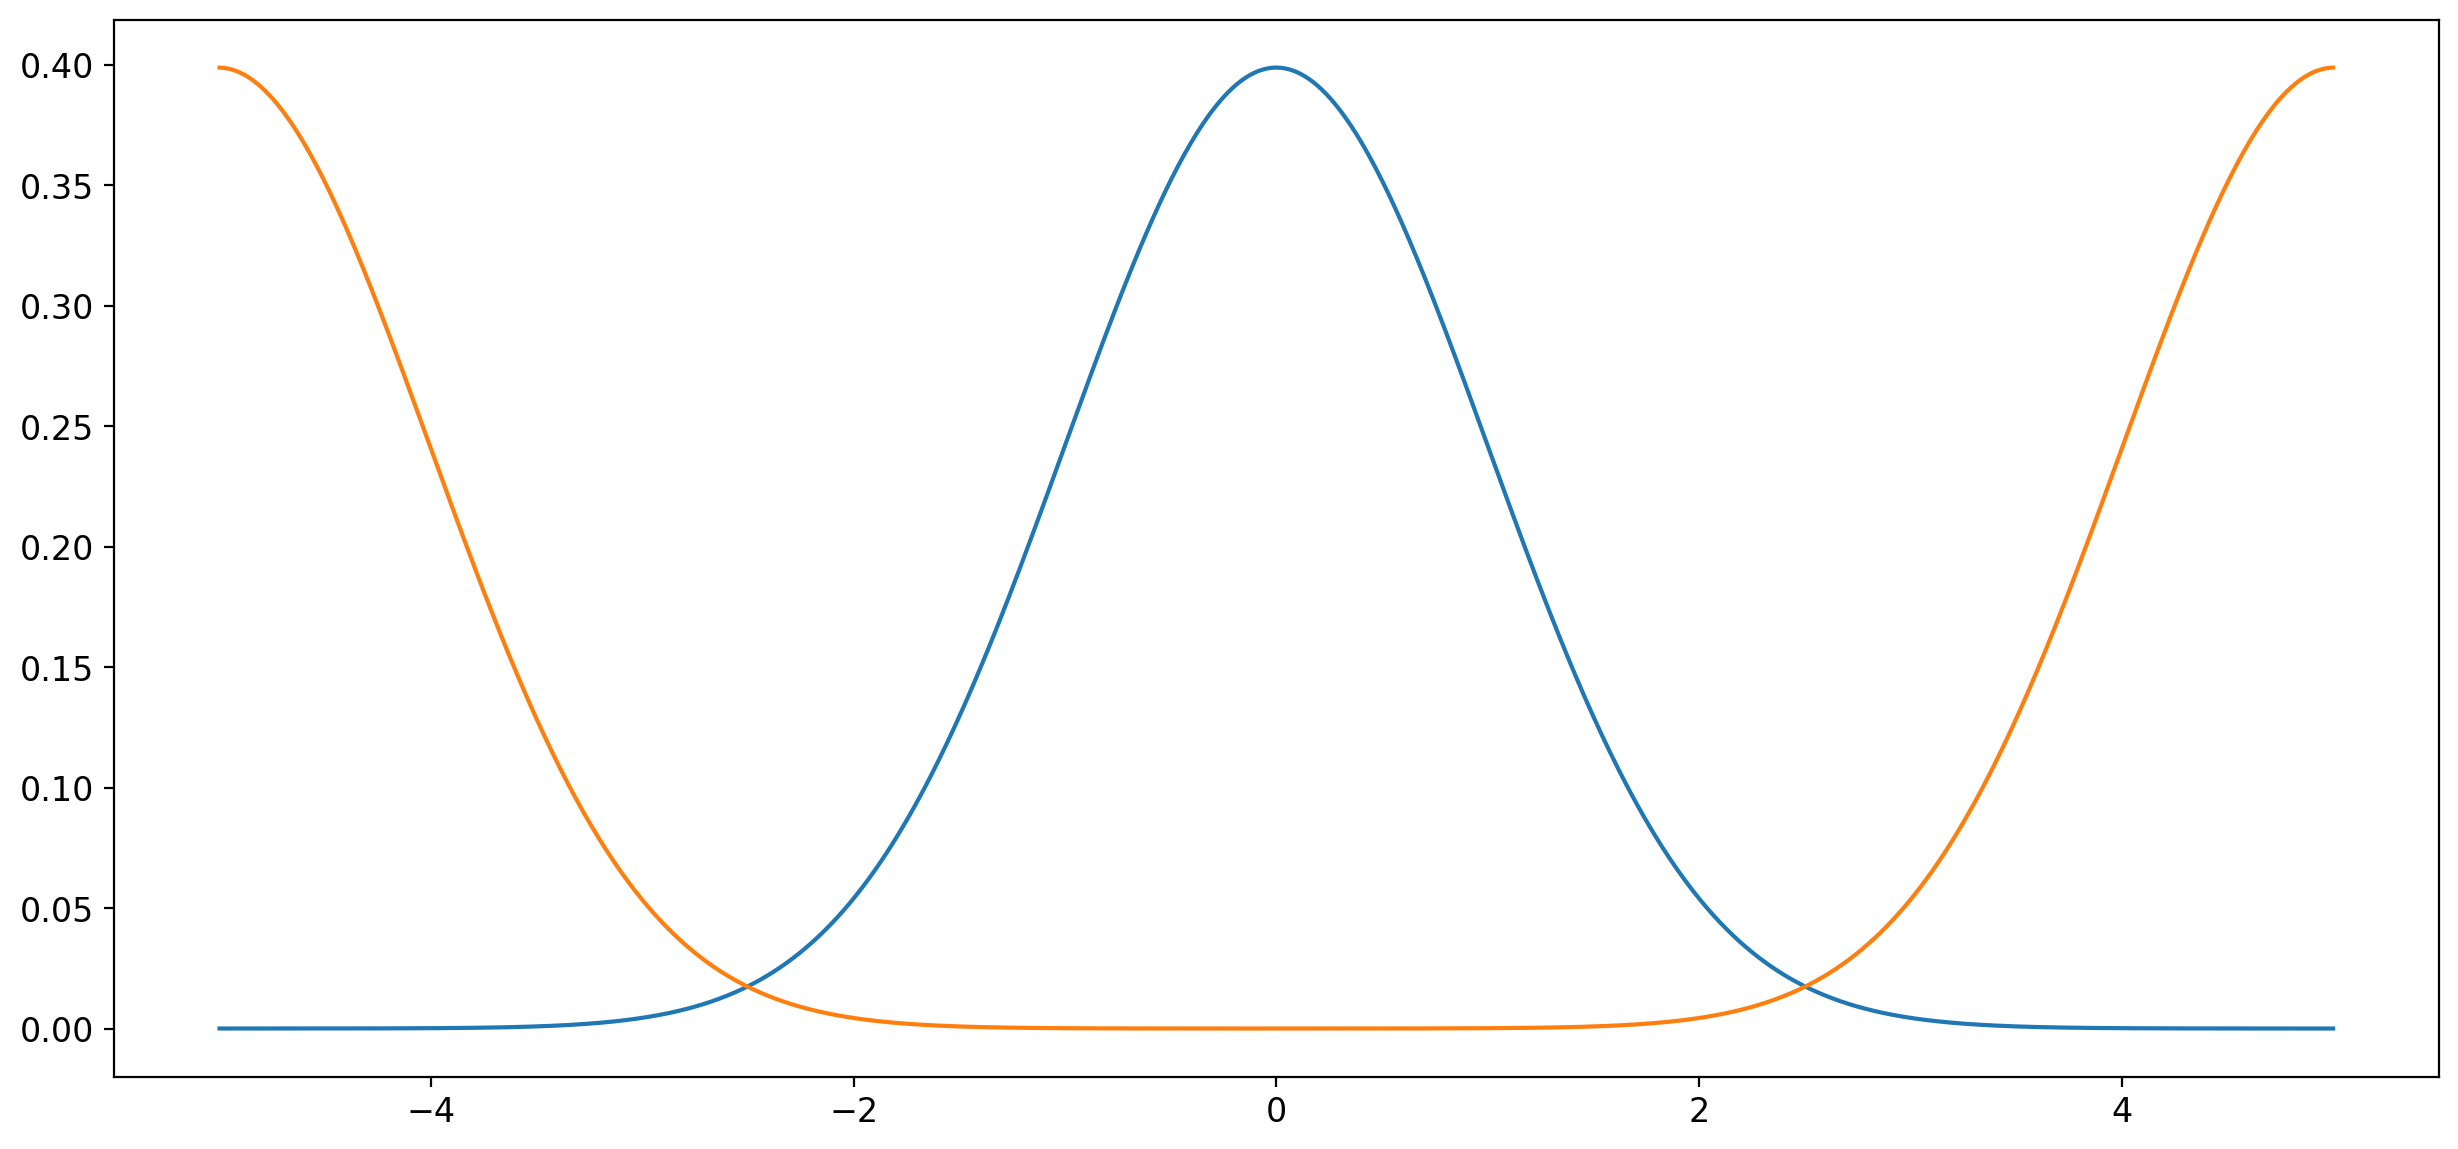

In [72]:
plt.plot(xvals, gaussian)
plt.plot(xvals, shifted_gaussian)

# Problem 2

In [73]:
def correlate(arr1, arr2):
    """Calculate the correlation function for two arrays."""
    dtype = (arr1 + arr2).dtype
    return np.fft.ifft(np.fft.fft(arr1) * np.fft.fft(arr2).conj()).astype(dtype)

In [74]:
gaussian_autocorrelation = correlate(gaussian, gaussian)
correlation_xvals = np.linspace(0, 1, xvals.size) * (xvals.max() - xvals.min())

/home/bobby/anaconda3/envs/hera/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


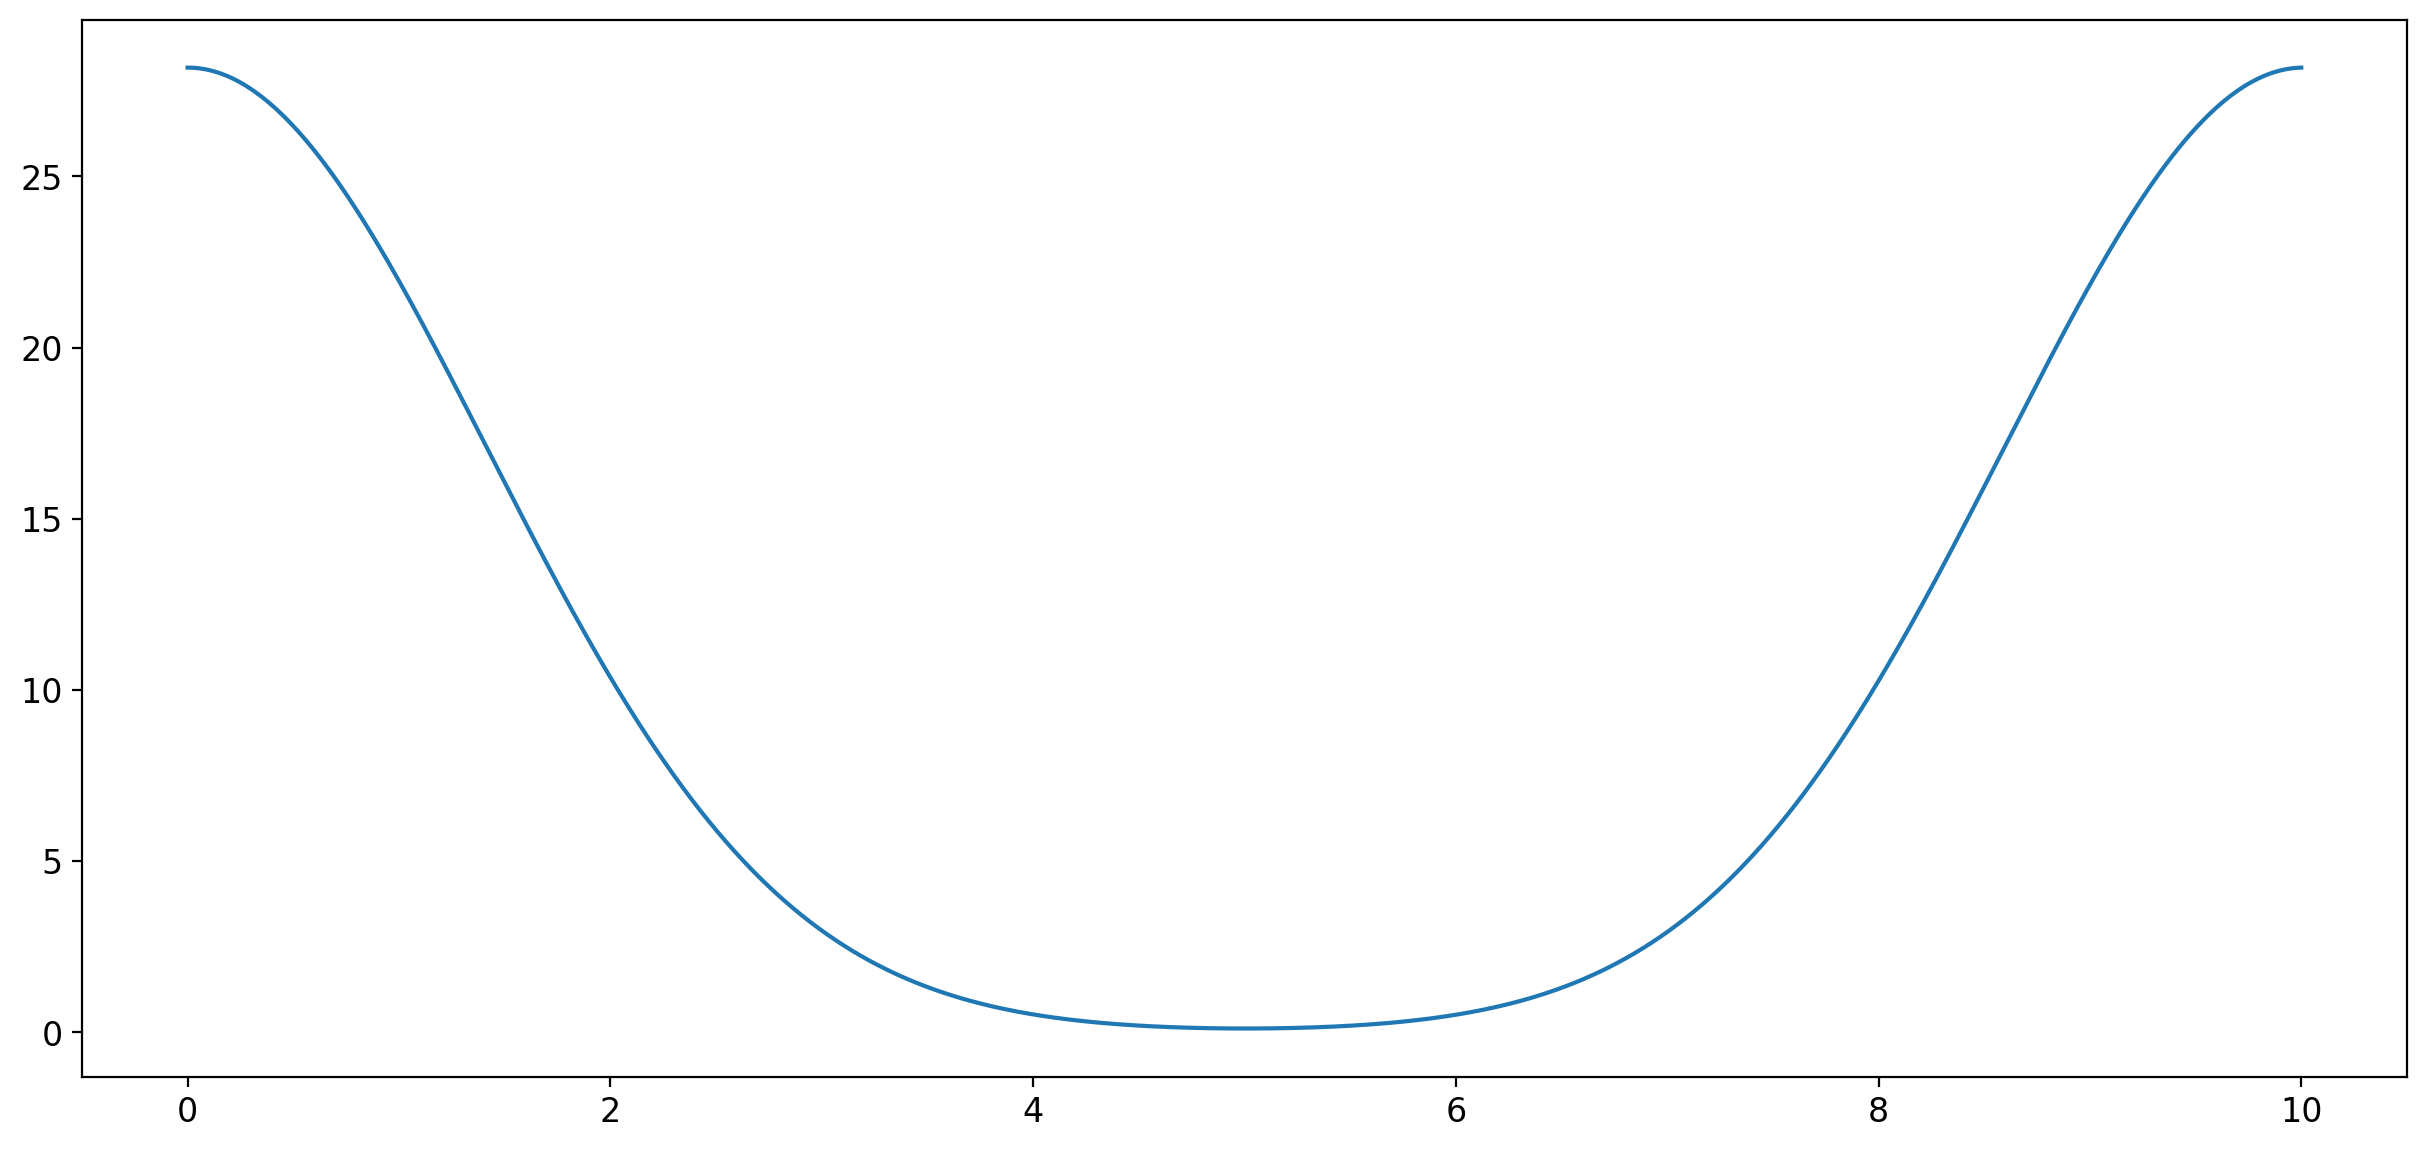

In [75]:
plt.plot(correlation_xvals, gaussian_autocorrelation)

# Problem 3

In [76]:
def shifted_correlation(arr1, arr2, amount):
    """Calculate the correlation of two arrays, with one shifted by some amount."""
    return correlate(arr1, shift(arr2, amount))

In [77]:
shift_lengths = (np.linspace(0, 1, 10, endpoint=False) * xvals.size).astype(int)
gaussian_autocorrs = np.array(
    [
        shifted_correlation(gaussian, gaussian, shift_length) 
        for shift_length in shift_lengths
    ]
)

/home/bobby/anaconda3/envs/hera/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


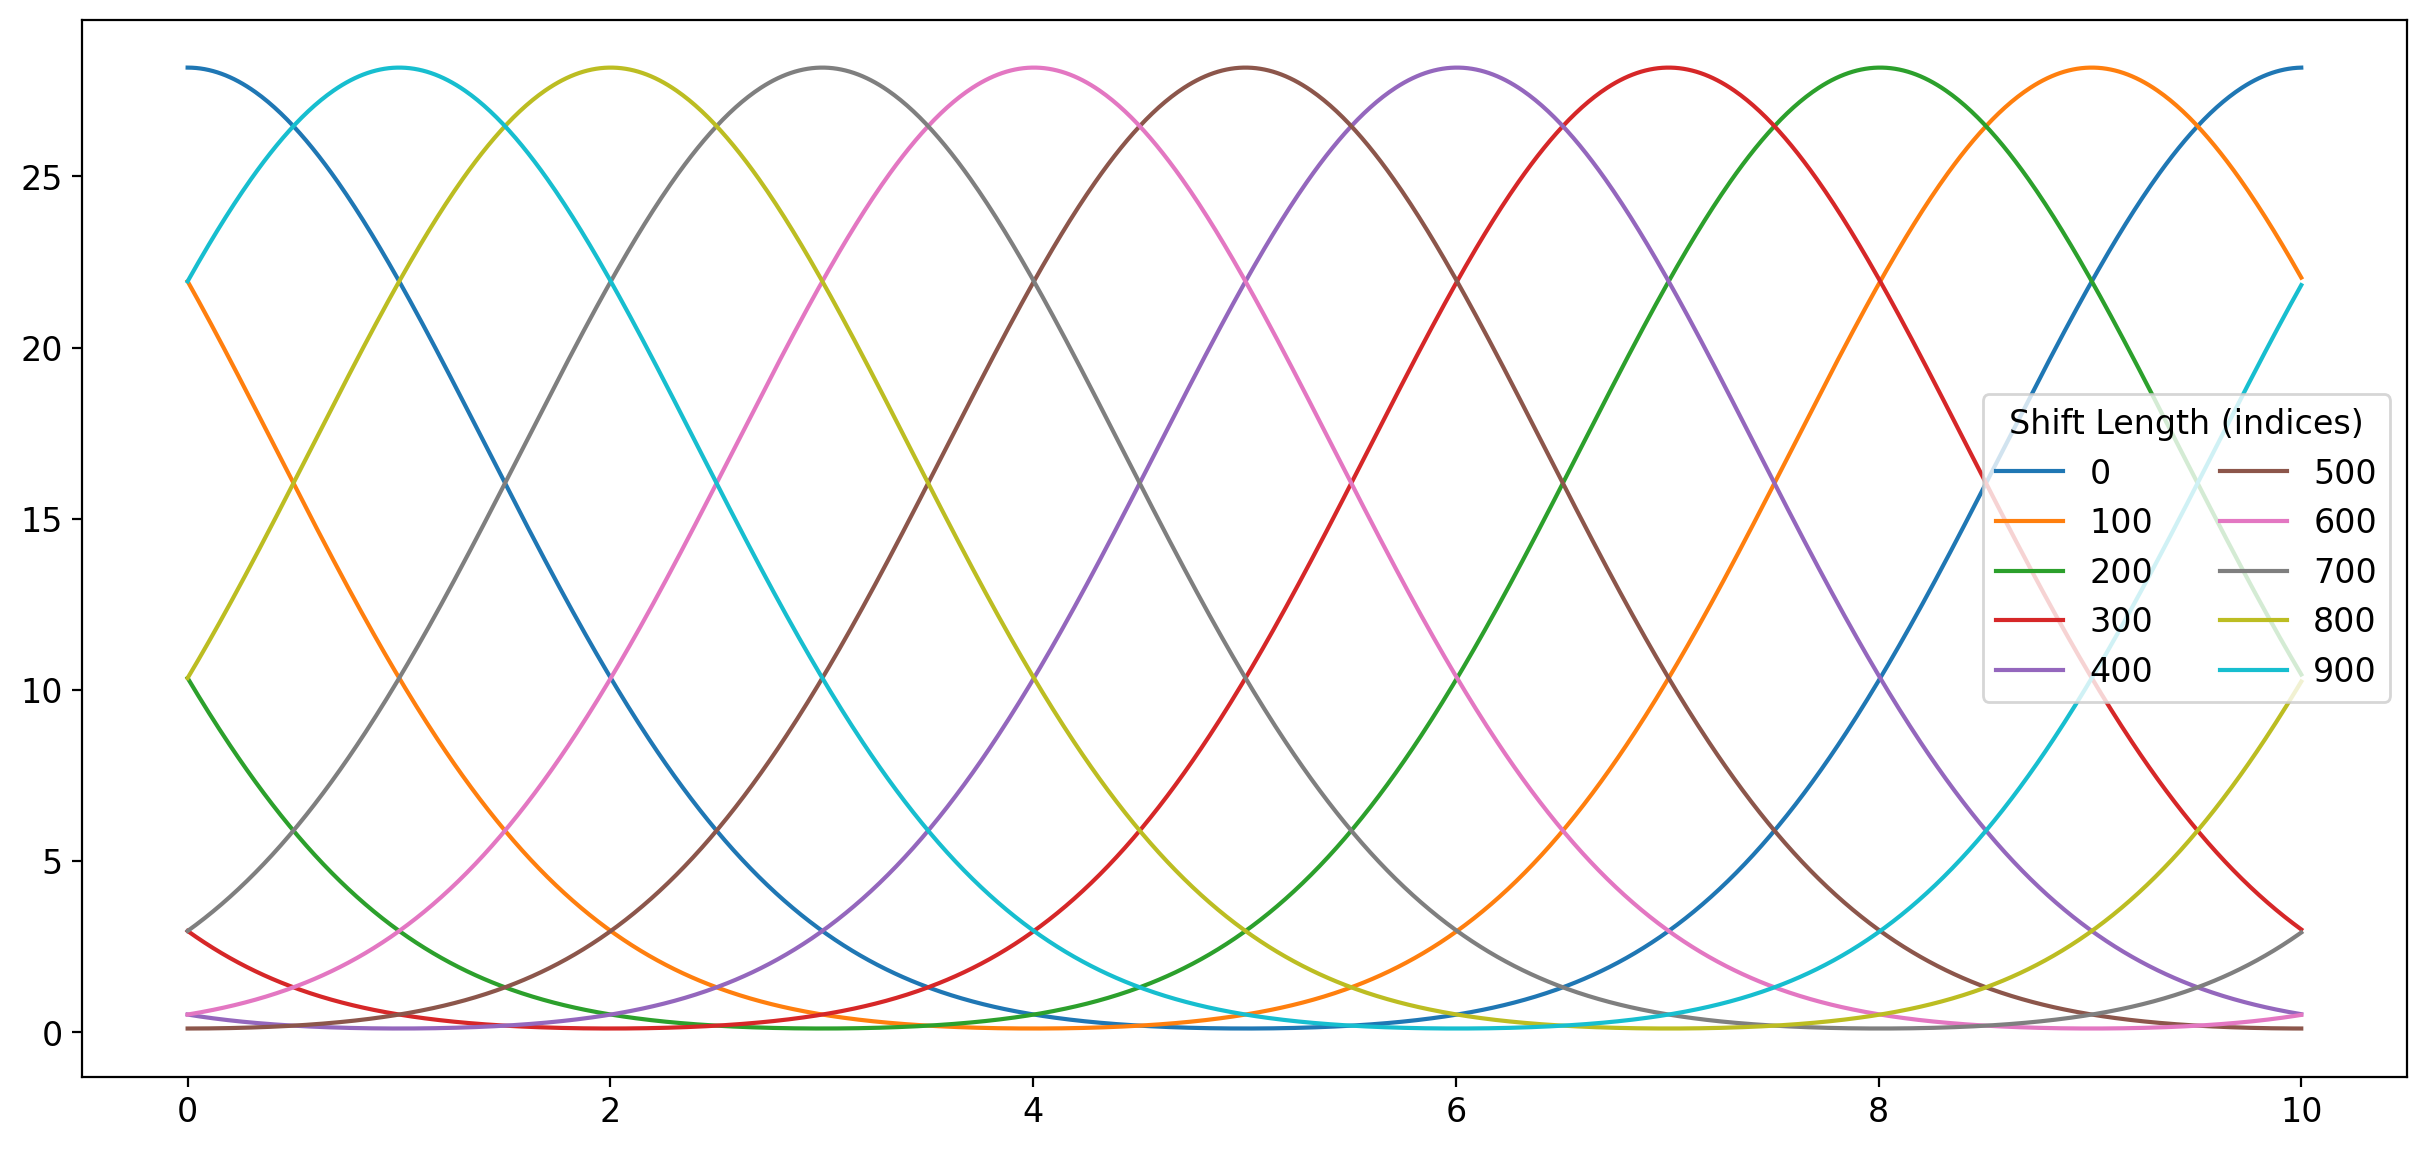

In [78]:
for autocorr, shift_length in zip(gaussian_autocorrs, shift_lengths):
    plt.plot(correlation_xvals, autocorr, label=shift_length)
plt.legend(title="Shift Length (indices)", ncol=2);

# Problem 4

In [79]:
def better_convolve(arr1, arr2, zeropad=5000):
    """Convolve two arrays while being careful about edge effects."""
    size = arr1.size
    arr1_zeropad = np.concatenate((arr1, np.zeros(zeropad, dtype=arr1.dtype)))
    arr2_zeropad = np.concatenate((arr2, np.zeros(zeropad, dtype=arr2.dtype)))
    return convolve(arr1_zeropad, arr2_zeropad)[:size]

In [80]:
# Test this using the detector example from class.
decay_rate = 50
hits = 50
times = np.linspace(0, 1000, 10000)
hit_indices = np.random.randint(0, times.size, hits)
hit_amplitudes = np.random.normal(loc=0, scale=3, size=hits) ** 2
measured_temps = np.zeros(times.size)
for index, amplitude in zip(hit_indices, hit_amplitudes):
    t0 = times[index]
    response = amplitude * np.exp(-(times - t0) / decay_rate)
    response = np.where(times < t0, 0, response)
    measured_temps += response
base_response = np.exp(-times / decay_rate)
impulses = np.zeros(times.size)
impulses[hit_indices] = hit_amplitudes
temps_from_conv = convolve(base_response, impulses)
temps_from_better_conv = better_convolve(base_response, impulses)

/home/bobby/anaconda3/envs/hera/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


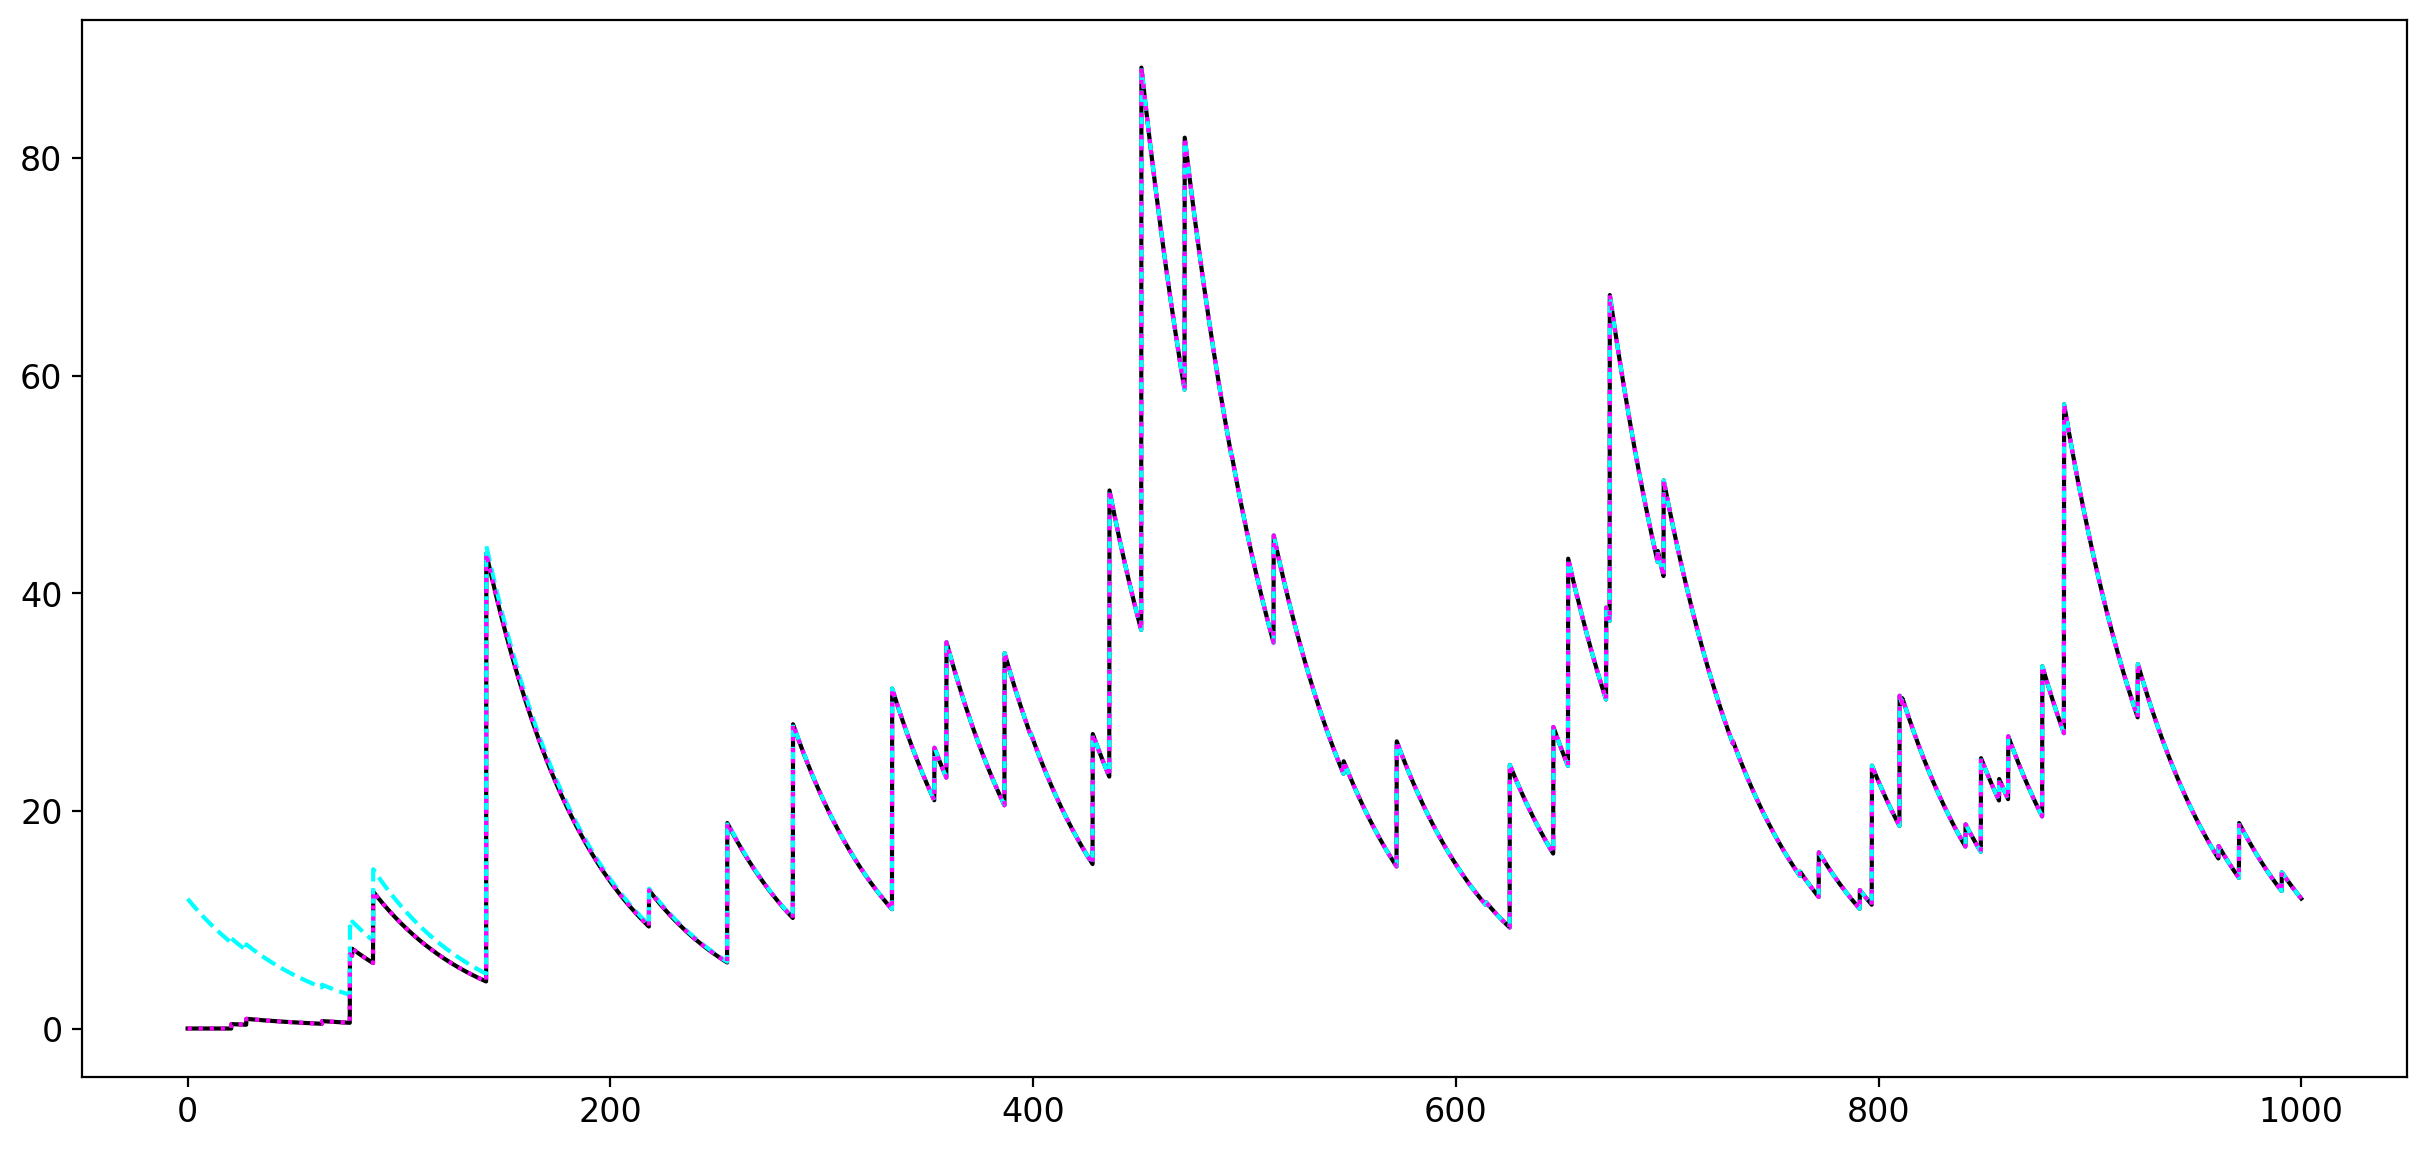

In [82]:
plt.plot(times, measured_temps, color='k')
plt.plot(times, temps_from_conv, ls='--', color='cyan')
plt.plot(times, temps_from_better_conv, ls=':', color='magenta')

# Problem 5

## Part a

## Part b

## Part c

## Part d

## Part e